In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random

In [21]:
dataset = pd.read_csv("1895-2022.csv")
dataset.head()

,Date,Value,Anomaly
0,189507,61.50,-1.98
1,189607,63.69,0.21
2,189707,62.23,-1.25
3,189807,63.39,-0.09
4,189907,61.16,-2.32


In [22]:
dataset.columns = ['Date', 'Temperature', 'Anomaly']
dataset

,Date,Temperature,Anomaly
0,189507,61.50,-1.98
1,189607,63.69,0.21
2,189707,62.23,-1.25
3,189807,63.39,-0.09
4,189907,61.16,-2.32
...,...,...,...
119,201407,63.51,0.03
120,201507,64.77,1.29
121,201607,66.15,2.67
122,201707,66.24,2.76


In [23]:
dataset.Date = dataset.Date.floordiv(100)
dataset

,Date,Temperature,Anomaly
0,1895,61.50,-1.98
1,1896,63.69,0.21
2,1897,62.23,-1.25
3,1898,63.39,-0.09
4,1899,61.16,-2.32
...,...,...,...
119,2014,63.51,0.03
120,2015,64.77,1.29
121,2016,66.15,2.67
122,2017,66.24,2.76


<Figure size 640x480 with 0 Axes>

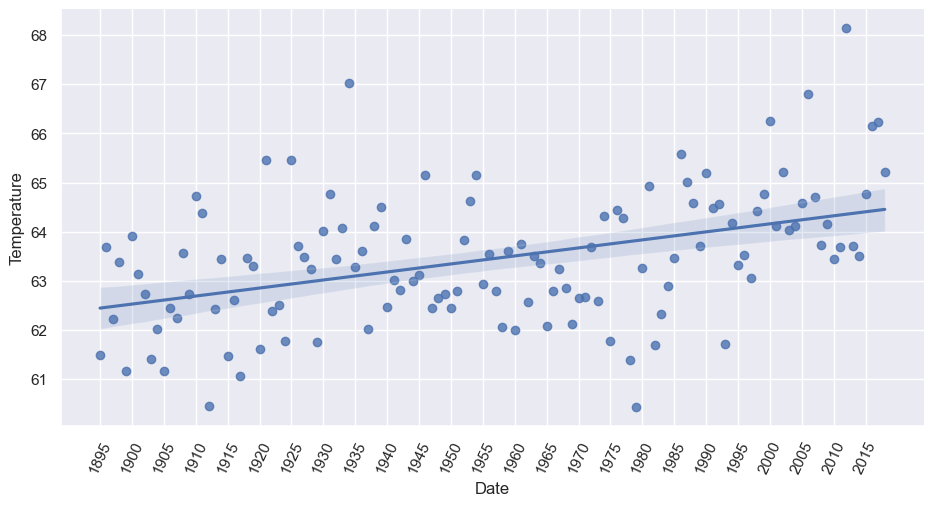

In [83]:
sns.lmplot(x="Date", y="Temperature", data=dataset, aspect=1.9)
plt.xticks(range(1895, 2020, 5), rotation=65)
plt.show()

In [70]:
linear_regression = stats.linregress(x = dataset.Date, y = dataset.Temperature)
predicts = [(linear_regression.slope * x + linear_regression.intercept) for x in range(2019, 2023)]
for x, i in zip(predicts, range(2019,2023)):
    print(f'Очікувана температура в {i} році: {x}')

Очікувана температура в 2019 році: 64.4694256490952
Очікувана температура в 2020 році: 64.48575710464202
Очікувана температура в 2021 році: 64.50208856018882
Очікувана температура в 2022 році: 64.51842001573564


In [80]:
random_year = random.randint(1800, 1890)
predict = linear_regression.slope * random_year + linear_regression.intercept
print(f'Можлива температура в {random_year} році: {predict}')

Можлива температура в 1854 році: 61.77473548387097


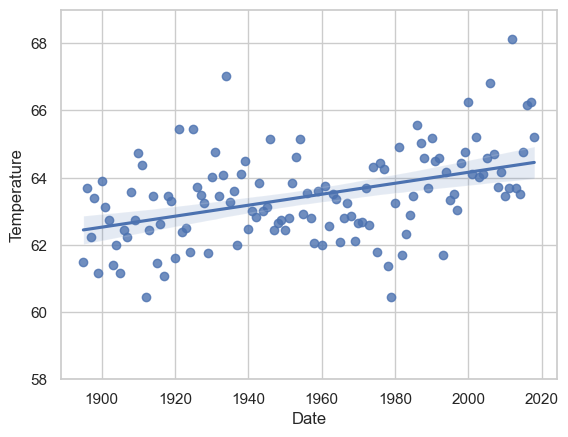

In [93]:
plt.clf()
sns.set_style('whitegrid')
axes = sns.regplot(x='Date', y='Temperature', data=dataset)
axes.set_ylim(58, 69)
plt.show()